# Introduction

This is the ipython notebook file where our group did the most of our data analysis. Feel free to run the individual cells and follow along with the comments. It's not very hard to understand and quite straightfoward. 

PS. Hello Professor Zhang! 🙋‍♂️

In [1]:
# Data Analysis Packages
from sklearn import preprocessing
import pandas as pd
import numpy as np
import pickle as pk

In [2]:
# Graphing Packages
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Import and Save Data

### Bitcoin Block Data (from Prof. Zhang)

In [35]:
# Import BTC Dataset given to us by Prof. Zhang
file_location = 'og_data_csv\\og_block_data.csv'
btc_block_data = pd.read_csv(file_location,low_memory=False)

# Save the data as a pickled pandas dataframe
pk.dump(btc_block_data, open( "og_data_binary\\og_block_data.p", "wb" ) )

### Crypto Search Data (from Google Trends)

In [60]:
# Import pytrends package
from pytrends.request import TrendReq

# Set the keyword & timeframe
keywords = ["Bitcoin", "Ethereum"]
pt.build_payload(keywords, timeframe="all")

# Get the interest over time
crypto_search = pt.interest_over_time()

# Save search data as pickled pandas datafame and .csv file
pk.dump(crypto_search, open( "og_data_binary\\og_search_data.p", "wb" ) )
crypto_search.to_csv("og_data_csv\\og_search_data.csv")

### Crypto Price Data (from Yahoo Finance)

In [ ]:
# Import yfinance package
import yfinance as yf
crypto_price = yf.download("BTC-USD", start="2009-01-01", end="2021-01-19",interval = "1d")

# Save price data as pickled pandas datafame and .csv file
pk.dump(crypto_price, open( "og_data_binary\\og_price_data.p", "wb" ) )
crypto_price.to_csv("og_data_csv\\og_price_data.csv")

### Check that everything was imported and saved successfully

In [63]:
# Bitcoin block data
pk.load(open("og_data_binary\\og_block_data.p", "rb"))

,height,host,volume,stripped_size,size,weight,avg_trans_fee_per_trans,block_reward,block_reward_tips,time
0,0,unknown,1,285,285,1140,0.000000,50.00,0.000000,3/1/2009 18:15
1,1,unknown,1,215,215,860,0.000000,50.00,0.000000,9/1/2009 2:54
2,2,unknown,1,215,215,860,0.000000,50.00,0.000000,9/1/2009 2:55
3,3,unknown,1,215,215,860,0.000000,50.00,0.000000,9/1/2009 3:02
4,4,unknown,1,215,215,860,0.000000,50.00,0.000000,9/1/2009 3:16
...,...,...,...,...,...,...,...,...,...,...
666611,666594,ViaBTC,1968,881571,1348518,3993231,0.000239,6.25,0.953732,18/1/2021 10:29
666612,666595,Foundry,2474,893448,1312647,3992991,0.000160,6.25,0.637013,18/1/2021 10:33
666613,666596,F2Pool,1896,819022,1541514,3998580,0.000123,6.25,0.493446,18/1/2021 10:41
666614,666597,Huobi.pool,2192,912273,1256245,3993064,0.000040,6.25,0.158978,18/1/2021 10:40


In [ ]:
# Crypto search data
pk.load(open("og_data_binary\\og_search_data.p", "rb"))

In [ ]:
# BTC-USD price data
pk.load(open("og_data_binary\\og_price_data.p", "rb"))

# Block & Search Data

### Import the original datasets

In [13]:
# Bitcoin block data
og_block_data = pk.load(open("og_data_binary\\og_block_data.p", "rb"))
# Crypto search data
og_search_data = pk.load(open("og_data_binary\\og_search_data.p", "rb"))

### Match the date range for both datasets

In [19]:
# Truncate the data to match the date range of the bitcoin block dataset
new_search_data = og_search_data.truncate(
    before=list(og_search_data.index)[60],
    after=list(og_search_data.index)[204]
)
# Save the pickeled pandas dataframe
pk.dump(new_search_data, open("block_and_search\\new_search_data.p", "wb" ))

In [20]:
# Drop columns with non-numerical data and height (because it's useless)
block_data = og_block_data.drop(['host','height'],inplace=False,axis=1)

dic = {}

for i in list(block_data.index)[:]:
    lst = [ ]
    for k in [block_data[c][i] for c in block_data.columns]:
        if type(k) == str:
            key = k.split(" ")[0]
            var = key.split('/')  
            new_key = var[-2] + '/' + var[-1]
        else:
            lst.append(k)
            
    if key not in dic.keys():
        dic[new_key] = lst
        
new_block_data = pd.DataFrame.from_dict(data=dic,orient='index',columns=list(block_data.columns)[:-1])
# Save the pickeled pandas dataframe
pk.dump(new_block_data, open("block_and_search\\new_block_data.p", "wb" ))

### Check that the data was cleaned and saved correctly

In [ ]:
pk.load(open("block_and_search\\new_block_data.p", "rb" ))

,volume,stripped_size,size,weight,avg_trans_fee_per_trans,block_reward,block_reward_tips
1/2009,1,216,216,864,0.000000,50.00,0.000000
2/2009,1,216,216,864,0.000000,50.00,0.000000
3/2009,1,216,216,864,0.000000,50.00,0.000000
4/2009,1,216,216,864,0.000000,50.00,0.000000
5/2009,1,216,216,864,0.000000,50.00,0.000000
...,...,...,...,...,...,...,...
9/2020,2783,940687,1176404,3998465,0.000122,6.25,0.485954
10/2020,2364,921982,1232764,3998710,0.000168,6.25,0.670329
11/2020,2923,923692,1221624,3992700,0.000221,6.25,0.880890
12/2020,2126,907164,1272042,3993534,0.000088,6.25,0.349810


In [ ]:
pk.load(open("block_and_search\\new_search_data.p", "rb" ))

,Bitcoin,Ethereum,isPartial
date,,,
2009-01-01,0,0,False
2009-02-01,0,0,False
2009-03-01,0,0,False
2009-04-01,0,0,False
2009-05-01,0,0,False
...,...,...,...
2020-09-01,13,2,False
2020-10-01,13,1,False
2020-11-01,23,3,False


### Concatenate Block and Search Data

In [50]:
# Load binary files
new_block_data = pk.load(open("block_and_search\\new_block_data.p", "rb" ))
new_search_data = pk.load(open("block_and_search\\new_search_data.p", "rb" ))

# Match the indexes
new_block_data = new_block_data.set_index(new_search_data.index)

# Concatenate the block and search datasets
block_and_search_concat = pd.concat([new_search_data,new_block_data], axis=1)
block_and_search_concat.drop(['isPartial'],inplace=True,axis=1)

# Save the concatenated dataset
block_and_search_concat.to_csv("block_and_search\\block_and_search_concat.csv")
pk.dump(block_and_search_concat, open("block_and_search\\block_and_search_concat.p", "wb" ))

# Show the dataset
block_and_search_concat

,Bitcoin,Ethereum,volume,stripped_size,size,weight,avg_trans_fee_per_trans,block_reward,block_reward_tips
date,,,,,,,,,
2009-01-01,0,0,1,216,216,864,0.000000,50.00,0.000000
2009-02-01,0,0,1,216,216,864,0.000000,50.00,0.000000
2009-03-01,0,0,1,216,216,864,0.000000,50.00,0.000000
2009-04-01,0,0,1,216,216,864,0.000000,50.00,0.000000
2009-05-01,0,0,1,216,216,864,0.000000,50.00,0.000000
...,...,...,...,...,...,...,...,...,...
2020-09-01,13,2,2783,940687,1176404,3998465,0.000122,6.25,0.485954
2020-10-01,13,1,2364,921982,1232764,3998710,0.000168,6.25,0.670329
2020-11-01,23,3,2923,923692,1221624,3992700,0.000221,6.25,0.880890


### Calculate the correlation between the data points

In [58]:
# Load binary files
block_and_search_concat = pk.load(open("block_and_search\\block_and_search_concat.p", "rb" ))

# Show Correlation
block_and_search_corr = block_and_search_concat.corr(method='pearson')

# Saved the dataset
pk.dump(block_and_search_corr, open("block_and_search\\block_and_search_corr.p", "wb" ))

# Show the dataset
block_and_search_corr

,Bitcoin,Ethereum,volume,stripped_size,size,weight,avg_trans_fee_per_trans,block_reward,block_reward_tips
Bitcoin,1.000000,0.893272,0.535053,0.548638,0.563585,0.555803,0.091871,-0.543481,0.550378
Ethereum,0.893272,1.000000,0.439904,0.520764,0.523131,0.524149,0.092126,-0.470543,0.513984
volume,0.535053,0.439904,1.000000,0.907366,0.942120,0.922117,0.017954,-0.723766,0.544924
stripped_size,0.548638,0.520764,0.907366,1.000000,0.974877,0.997925,0.015273,-0.760779,0.588991
size,0.563585,0.523131,0.942120,0.974877,1.000000,0.987194,-0.020864,-0.770656,0.520569
weight,0.555803,0.524149,0.922117,0.997925,0.987194,1.000000,0.004908,-0.767580,0.572270
avg_trans_fee_per_trans,0.091871,0.092126,0.017954,0.015273,-0.020864,0.004908,1.000000,0.022688,0.410056
block_reward,-0.543481,-0.470543,-0.723766,-0.760779,-0.770656,-0.767580,0.022688,1.000000,-0.422997
block_reward_tips,0.550378,0.513984,0.544924,0.588991,0.520569,0.572270,0.410056,-0.422997,1.000000


### Visualize the correlation as a head map

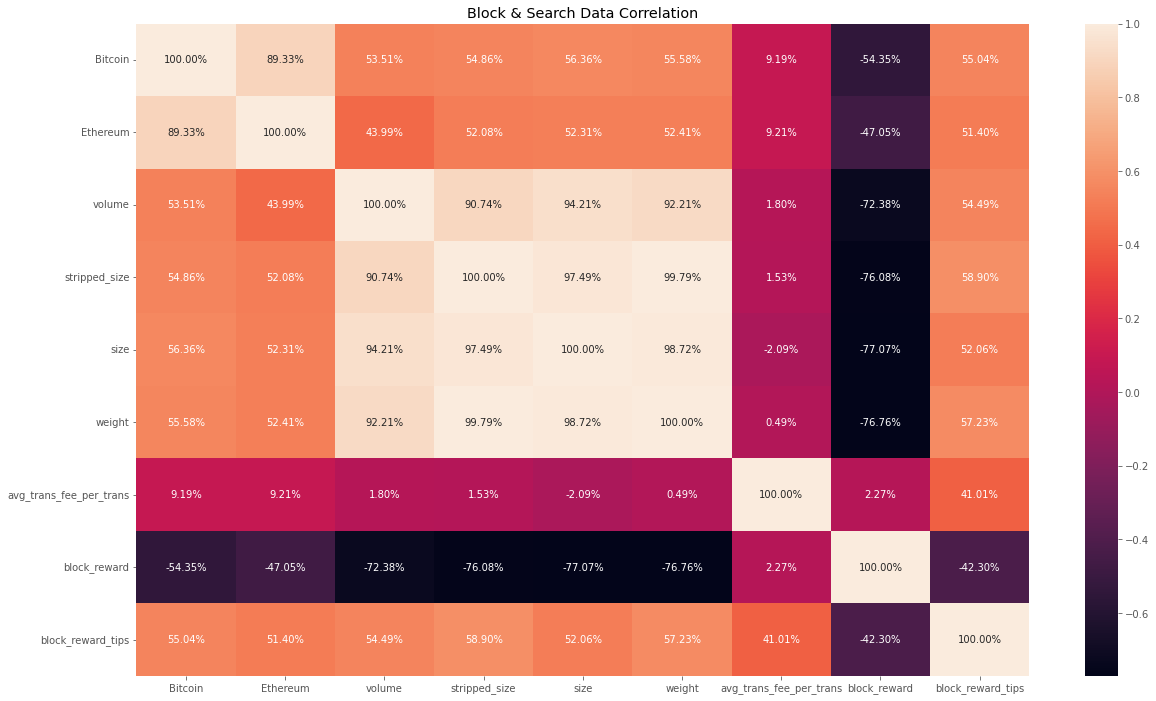

In [61]:
plt.subplots(figsize= (20,12))
sns.heatmap(block_and_search_corr, annot= True, fmt= '.2%')
plt.title("Block & Search Data Correlation")
plt.savefig("block_and_search\\block_and_search_corr.jpg", dpi = 300)

### Min-Max Scale the data so we can better visualize the change over time

In [52]:
# Load binary files
block_and_search_concat = pk.load(open("block_and_search\\block_and_search_concat.p", "rb" ))

# Scale the data
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 100))
scaled = min_max_scaler.fit_transform(block_and_search_concat)
block_and_search_scaled = pd.DataFrame(scaled, columns = block_and_search_concat.columns)
block_and_search_scaled = block_and_search_scaled.set_index(block_and_search_concat.index)

pk.dump(block_and_search_scaled, open("block_and_search\\block_and_search_scaled.p", "wb" ))
block_and_search_scaled

,Bitcoin,Ethereum,volume,stripped_size,size,weight,avg_trans_fee_per_trans,block_reward,block_reward_tips
date,,,,,,,,,
2009-01-01,0.0,0.000000,0.000000,0.000800,0.000579,0.000800,0.000000,100.0,0.000000
2009-02-01,0.0,0.000000,0.000000,0.000800,0.000579,0.000800,0.000000,100.0,0.000000
2009-03-01,0.0,0.000000,0.000000,0.000800,0.000579,0.000800,0.000000,100.0,0.000000
2009-04-01,0.0,0.000000,0.000000,0.000800,0.000579,0.000800,0.000000,100.0,0.000000
2009-05-01,0.0,0.000000,0.000000,0.000800,0.000579,0.000800,0.000000,100.0,0.000000
...,...,...,...,...,...,...,...,...,...
2020-09-01,13.0,18.181818,77.342230,94.070101,85.115640,99.964417,5.415811,0.0,11.192310
2020-10-01,13.0,9.090909,65.693634,92.199159,89.194141,99.970543,7.470022,0.0,15.438766
2020-11-01,23.0,27.272727,81.234362,92.370199,88.387993,99.820258,9.831252,0.0,20.288305


### Visualize unscaled block and search data

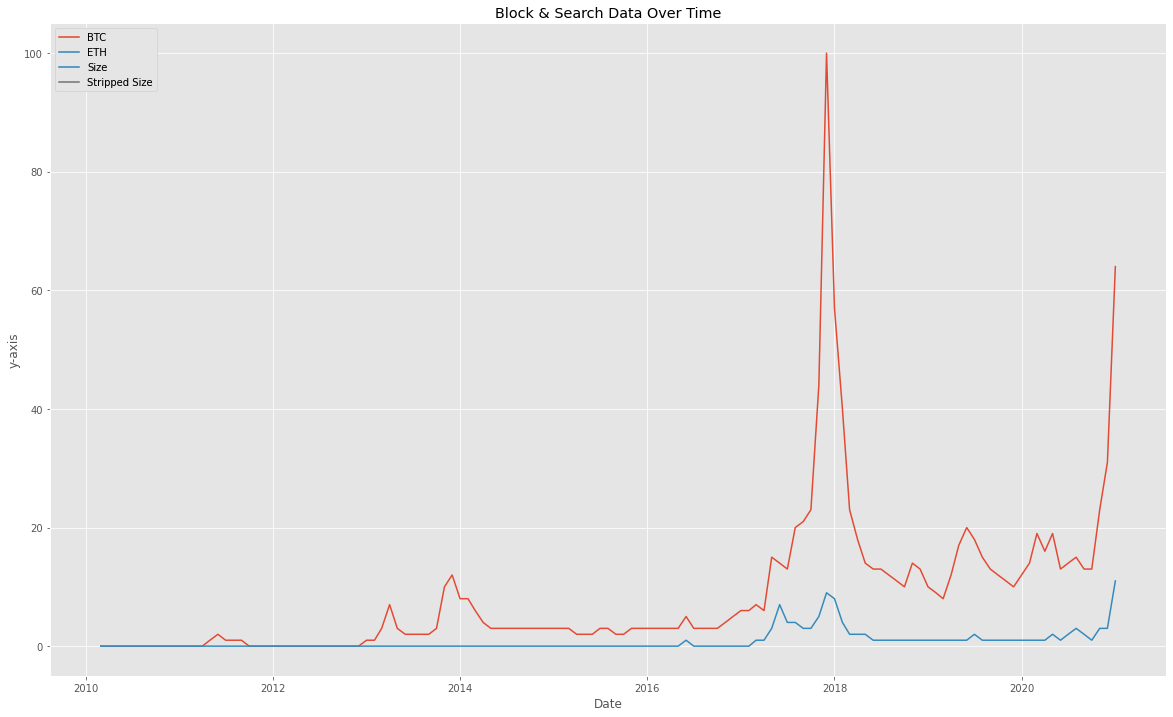

In [74]:
# Create subplots
fig, ax = plt.subplots()
line1, = ax.plot(block_and_search_concat['Bitcoin'].truncate(before=list(block_and_search_concat.index)[14]), label="BTC")
line2, = ax.plot(block_and_search_concat['Ethereum'].truncate(before=list(block_and_search_concat.index)[14]), label="ETH")
# line3, = ax.plot(block_and_search_concat['size'].truncate(before=list(block_and_search_concat.index)[14]), label="Size")
# line4, = ax.plot(block_and_search_concat['stripped_size'].truncate(before=list(block_and_search_concat.index)[14]), label="Stripped Size")

# Create a legend for the plot
first_legend = ax.legend(handles=[line1,line2,line3,line4], loc='upper left')

# Add the legend manually to the Axes.
ax.add_artist(first_legend)

# Label the x and y axis
plt.xlabel("Date")
plt.ylabel("y-axis")

# Add a title to the plot
plt.title("Block & Search Data Over Time")

# Resize the plot
plt.rcParams["figure.figsize"] = (20,12)

# Save the plot
# plt.savefig("plots\\crypto_iot.jpg", dpi = 300)

# Show the plot
plt.show()

### Visualize scaled block and search data

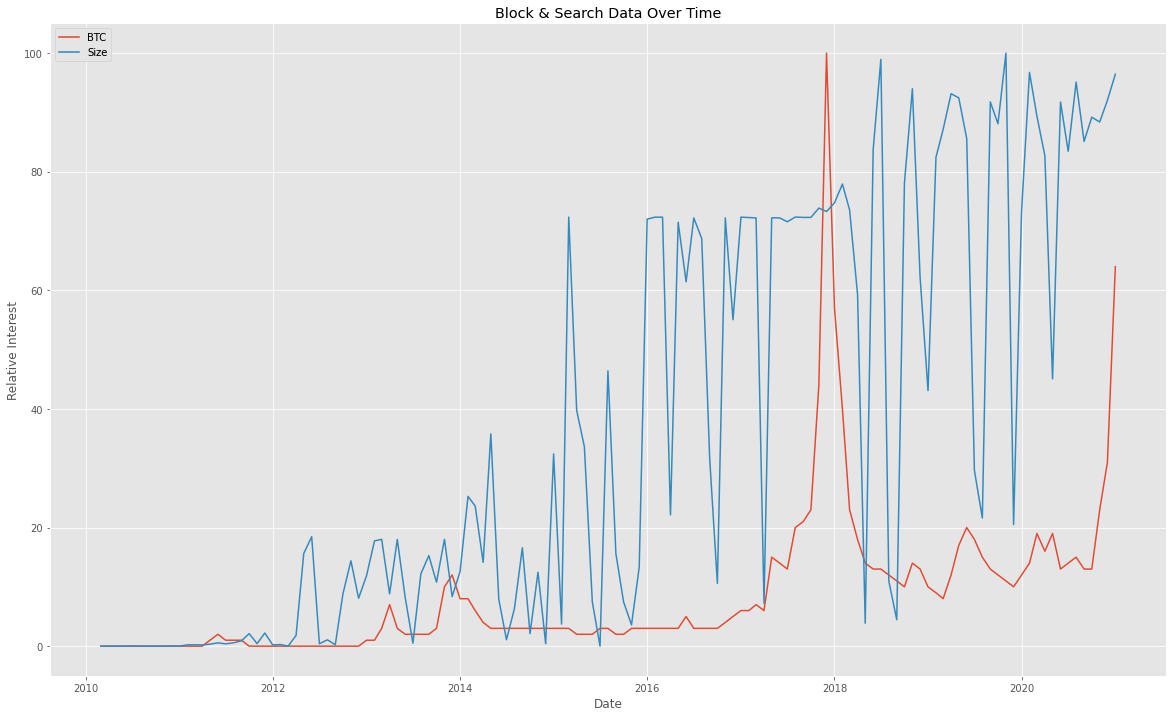

In [76]:
# Create subplots
fig, ax = plt.subplots()
line1, = ax.plot(block_and_search_scaled['Bitcoin'].truncate(before=list(block_and_search_scaled.index)[14]), label="BTC")
# line2, = ax.plot(block_and_search_scaled['Ethereum'].truncate(before=list(block_and_search_scaled.index)[14]), label="ETH")
line3, = ax.plot(block_and_search_scaled['size'].truncate(before=list(block_and_search_scaled.index)[14]), label="Size")
# line4, = ax.plot(block_and_search_scaled['stripped_size'].truncate(before=list(block_and_search_scaled.index)[14]), label="Stripped Size")

# Create a legend for the plot
first_legend = ax.legend(handles=[line1,line3], loc='upper left')

# Add the legend manually to the Axes.
ax.add_artist(first_legend)

# Label the x and y axis
plt.xlabel("Date")
plt.ylabel("Relative Interest")

# Add a title to the plot
plt.title("Block & Search Data Over Time")

# Resize the plot
plt.rcParams["figure.figsize"] = (20,12)

# Save the plot
# plt.savefig("plots\\crypto_iot.jpg", dpi = 300)

# Show the plot
plt.show()

# Price & Block Data

In [9]:
dic = {}
for i in list(block_data.index):
    lst = [ ]
    for k in [block_data[c][i] for c in block_data.columns]:
        if type(k) == str:
            key = k.split(" ")[0]
        else:
            lst.append(k)
            
    if key not in dic.keys():
        dic[key] = lst
# block_data_new = pd.DataFrame.from_dict(data=dic,orient='index',columns=list(block_data.columns)[:-1])
block_data_new = pd.DataFrame.from_dict(data=dic,orient='index')

In [207]:
block_data_new = block_data.set_index(btc_price.index)
price_and_data = pd.concat([test,btc_price],axis=1)
price_and_data

,volume,stripped_size,size,weight,avg_trans_fee_per_trans,block_reward_tips,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,,,,,,
2014-09-17,1092,603041,603041,2412164,0.000068,0.164946,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,350,143076,143076,572304,0.000087,0.049661,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,396,235727,235727,942908,0.000066,0.062611,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,919,629794,629794,2519176,0.000065,0.162859,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,1113,505590,505590,2022360,0.000077,0.155930,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-14,1476,940052,1173270,3993426,0.000351,1.400926,37325.109375,39966.406250,36868.562500,39187.328125,39187.328125,63615990033
2021-01-15,1752,886871,1332694,3993307,0.000357,1.425750,39156.707031,39577.710938,34659.589844,36825.367188,36825.367188,67760757881
2021-01-16,2722,834008,1491318,3993342,0.000354,1.413416,36821.648438,37864.367188,35633.554688,36178.140625,36178.140625,57706187875


In [216]:
#Scale the data
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 100))
scaled = min_max_scaler.fit_transform(price_and_data)
pad_scaled = pd.DataFrame(scaled, columns = price_and_data.columns)
pad_scaled = pad_scaled.set_index(price_and_dataata.index)
# pad_scaled.to_csv("data\\scale.csv")
pad_scaled

,volume,stripped_size,size,weight,avg_trans_fee_per_trans,block_reward_tips,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,,,,,,
2014-09-17,23.681354,60.296834,31.633502,60.296834,2.428940,1.467349,0.711536,0.614455,0.723825,0.687431,0.687431,0.012279
2014-09-18,7.575429,14.291915,7.497961,14.291915,3.082175,0.441780,0.689365,0.587346,0.622515,0.606450,0.606450,0.023167
2014-09-19,8.573909,23.558711,12.359597,23.558711,2.358608,0.556979,0.608706,0.517800,0.548893,0.533470,0.533470,0.025954
2014-09-20,19.926199,62.972624,33.037301,62.972624,2.296446,1.448778,0.536239,0.506925,0.562681,0.568202,0.568202,0.025098
2014-09-21,24.137183,50.549951,26.519999,50.549951,2.738685,1.387140,0.569264,0.480879,0.571179,0.543379,0.543379,0.016758
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-14,32.016497,94.004103,61.554877,99.835620,12.461193,12.462512,91.471602,95.254986,94.557209,96.035695,96.035695,51.583550
2021-01-15,38.007380,88.685029,69.920263,99.832644,12.682490,12.683351,95.981621,94.323645,88.865355,90.220851,90.220851,54.944682
2021-01-16,59.062297,83.397762,78.243670,99.833520,12.572374,12.573624,90.231909,90.218353,91.374968,88.627462,88.627462,46.791093


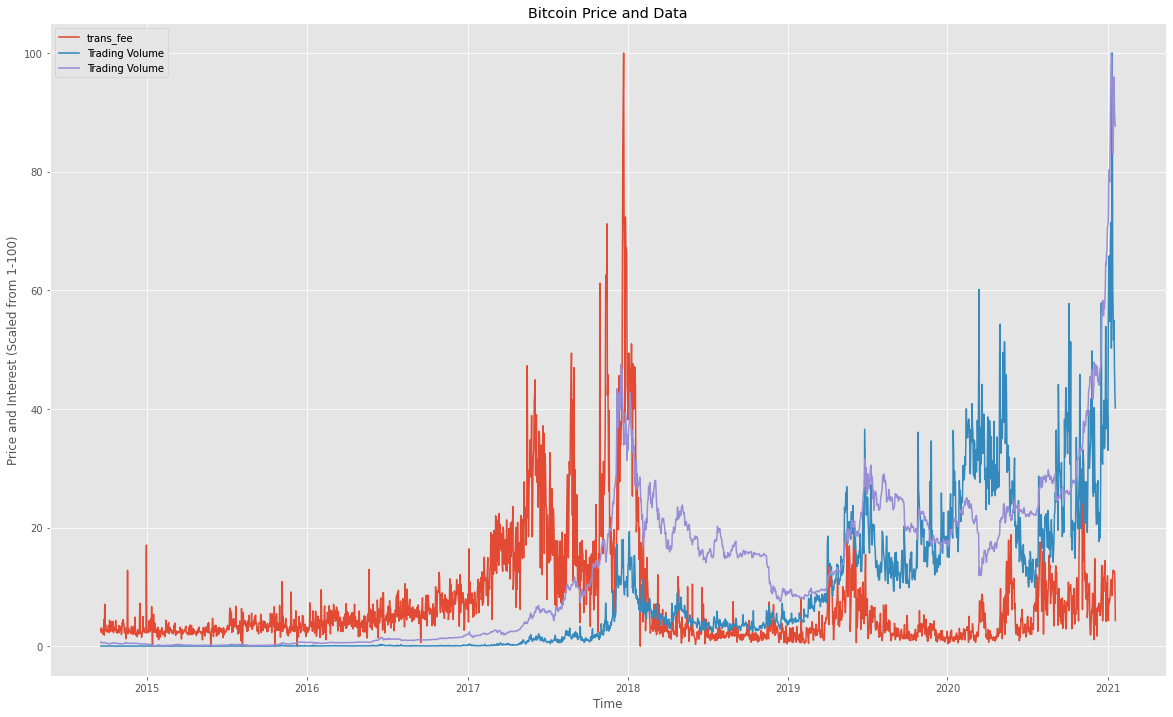

In [227]:
# Create subplots
fig, ax = plt.subplots()
line1, = ax.plot(pad_scaled['avg_trans_fee_per_trans'], label="Bitcoin Transaction Fees")
line2, = ax.plot(pad_scaled['Volume'], label="Trading Volume")
line3, = ax.plot(pad_scaled['Open'], label="Trading Volume")
# line3, = ax.plot(df_scale['High'], label="Price")
# line4, = ax.plot(df_scale['High'], label="Price")
# line5, = ax.plot(df_scale['High'], label="Price")

# Create a legend for the plot
first_legend = ax.legend(handles=[line1,line2,line3], loc='upper left')

# Add the legend manually to the Axes.
ax.add_artist(first_legend)

# Label the x and y axis
plt.xlabel("Time")
plt.ylabel("Price and Interest (Scaled from 1-100)")

# Add a title to the plot
plt.title("Crypto Price and Block Data")

# Save the plot to present directory
plt.rcParams["figure.figsize"] = (20,12)

# Show the plot
plt.show()

In [252]:
# Show Correlation
pad_corr = pad_scaled.corr(method='pearson')
pad_corr.to_csv("correlation\\pad_corr.csv")
pad_corr

,volume,stripped_size,size,weight,avg_trans_fee_per_trans,block_reward_tips,Open,High,Low,Close,Adj Close,Volume
volume,1.000000,0.704247,0.755034,0.750000,0.198227,0.263599,0.287412,0.285065,0.290165,0.285647,0.285647,0.282685
stripped_size,0.704247,1.000000,0.821301,0.982057,0.283066,0.368705,0.191818,0.192695,0.191671,0.191934,0.191934,0.156299
size,0.755034,0.821301,1.000000,0.914152,0.127659,0.210854,0.506429,0.502717,0.512665,0.505699,0.505699,0.520251
weight,0.750000,0.982057,0.914152,1.000000,0.243336,0.331689,0.303707,0.303103,0.305664,0.303547,0.303547,0.283037
avg_trans_fee_per_trans,0.198227,0.283066,0.127659,0.243336,1.000000,0.985399,0.191395,0.197792,0.179066,0.189208,0.189208,0.009561
block_reward_tips,0.263599,0.368705,0.210854,0.331689,0.985399,1.000000,0.217569,0.223786,0.205527,0.215310,0.215310,0.037992
Open,0.287412,0.191818,0.506429,0.303707,0.191395,0.217569,1.000000,0.999029,0.998276,0.998064,0.998064,0.786681
High,0.285065,0.192695,0.502717,0.303103,0.197792,0.223786,0.999029,1.000000,0.997988,0.999236,0.999236,0.787103
Low,0.290165,0.191671,0.512665,0.305664,0.179066,0.205527,0.998276,0.997988,1.000000,0.998822,0.998822,0.785990
Close,0.285647,0.191934,0.505699,0.303547,0.189208,0.215310,0.998064,0.999236,0.998822,1.000000,1.000000,0.786690


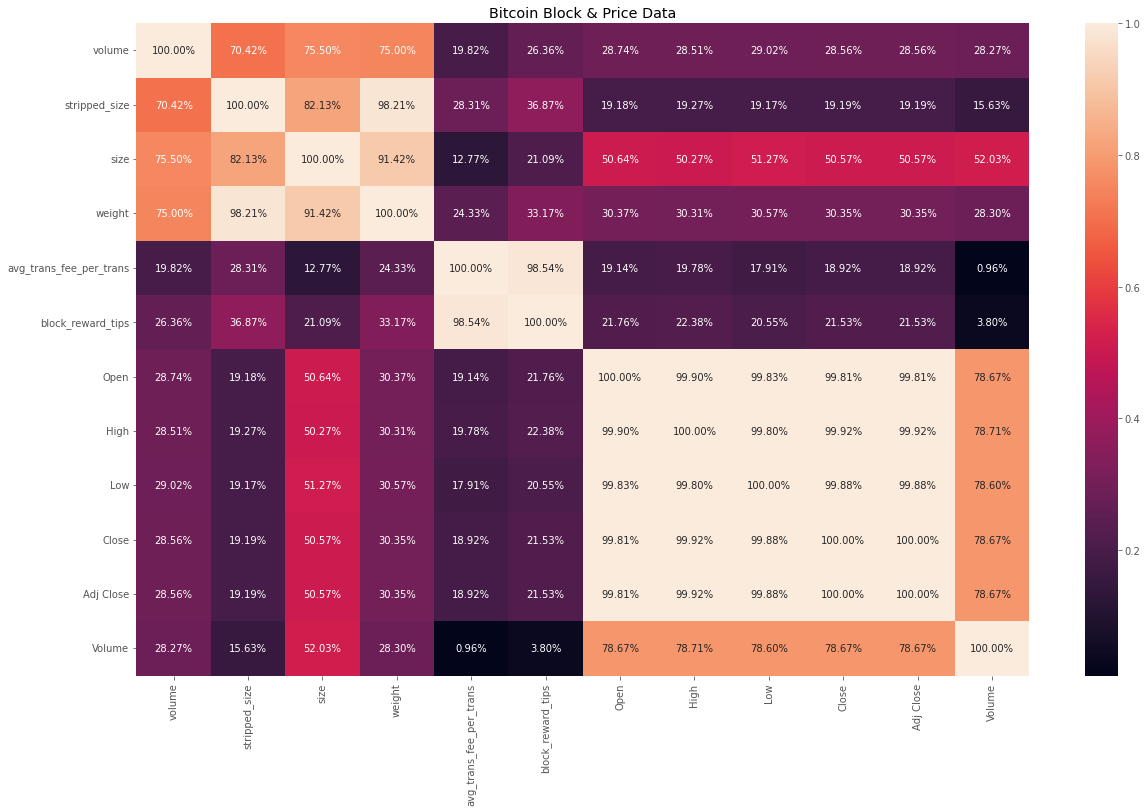

In [260]:
plt.subplots(figsize= (20,12))
sns.heatmap(pad_corr, annot= True, fmt= '.2%')
plt.title("Bitcoin Block & Price Data")
plt.savefig("plots\\pad_corr.jpg", dpi = 300)

In [264]:
for i in iot.index:
    # print(str(i)[8:10])
    if int(str(i)[2:4]) < 14:
        iot.drop(i, inplace=True)
    if str(i)[2:4] == '14' and int(str(i)[5:7]) < 10:
        iot.drop(i, inplace=True)
iot.drop('isPartial',inplace=True,axis=1)

In [265]:
# Concatendate the two dataframes
btc_df =  pd.read_csv("dataset.csv")
btc_df.drop('host',inplace=True,axis=1)
df_concat = pd.concat([iot,btc],axis=1)
btc_df = btc_df.truncate(before=323278)
btc_df

,height,volume,stripped_size,size,weight,avg_trans_fee_per_trans,block_reward,block_reward_tips,time
323278,323270,96,63007,63007,252028,0.000017,25.00,0.004300,1/10/2014 0:02
323279,323271,1173,607835,607835,2431340,0.000071,25.00,0.173676,1/10/2014 0:25
323280,323272,419,232124,232124,928496,0.000067,25.00,0.062366,1/10/2014 0:33
323281,323273,274,154179,154179,616716,0.000055,25.00,0.034045,1/10/2014 0:37
323282,323274,377,189472,189472,757888,0.000081,25.00,0.061242,1/10/2014 0:43
...,...,...,...,...,...,...,...,...,...
666611,666594,1968,881571,1348518,3993231,0.000239,6.25,0.953732,18/1/2021 10:29
666612,666595,2474,893448,1312647,3992991,0.000160,6.25,0.637013,18/1/2021 10:33
666613,666596,1896,819022,1541514,3998580,0.000123,6.25,0.493446,18/1/2021 10:41
666614,666597,2192,912273,1256245,3993064,0.000040,6.25,0.158978,18/1/2021 10:40


In [266]:
#Scale the data
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 100))
scaled = min_max_scaler.fit_transform(df_concat)
df_scale = pd.DataFrame(scaled, columns = df_concat.columns)
df_scale = df_scale.set_index(df_concat.index)
df_scale.to_csv("data\\btc_eth_price_to_trends.csv")
df_scale

,Bitcoin,Ethereum,High,Low,Open,Close,Volume,Adj Close
2014-10-01,1.020408,0.000000,0.257547,0.283719,0.279133,0.264372,0.029505,0.264372
2014-11-01,1.020408,0.000000,0.175779,0.183312,0.199306,0.169168,0.014013,0.169168
2014-12-01,1.020408,0.000000,0.245138,0.276808,0.264112,0.257182,0.006043,0.257182
2015-01-01,1.020408,0.000000,0.143467,0.171457,0.169496,0.150248,0.000000,0.150248
2015-02-01,1.020408,0.000000,0.000576,0.000000,0.000000,0.006657,0.034206,0.006657
...,...,...,...,...,...,...,...,...
2022-01-01,36.734694,40.909091,76.536082,77.461357,75.437278,78.089389,39.854332,78.089389
2022-02-01,32.653061,31.818182,62.526612,63.718275,62.623004,63.375139,32.890193,63.375139
2022-03-01,27.551020,27.272727,71.657776,71.853218,70.335708,72.607167,52.660424,72.607167
2022-04-01,21.428571,22.727273,74.588642,74.291815,74.197445,75.777553,61.877895,75.777553


In [269]:
bpi_corr = df_scale.corr(method='pearson')
bpi_corr.to_csv("correlation\\bpi_corr.csv")
bpi_corr

,Bitcoin,Ethereum,High,Low,Open,Close,Volume,Adj Close
Bitcoin,1.000000,0.850388,0.667348,0.663064,0.666334,0.666257,0.608616,0.666257
Ethereum,0.850388,1.000000,0.843409,0.843146,0.845239,0.841750,0.650091,0.841750
High,0.667348,0.843409,1.000000,0.999463,0.999460,0.999804,0.786105,0.999804
Low,0.663064,0.843146,0.999463,1.000000,0.999758,0.999423,0.783231,0.999423
Open,0.666334,0.845239,0.999460,0.999758,1.000000,0.999083,0.784336,0.999083
Close,0.666257,0.841750,0.999804,0.999423,0.999083,1.000000,0.785568,1.000000
Volume,0.608616,0.650091,0.786105,0.783231,0.784336,0.785568,1.000000,0.785568
Adj Close,0.666257,0.841750,0.999804,0.999423,0.999083,1.000000,0.785568,1.000000


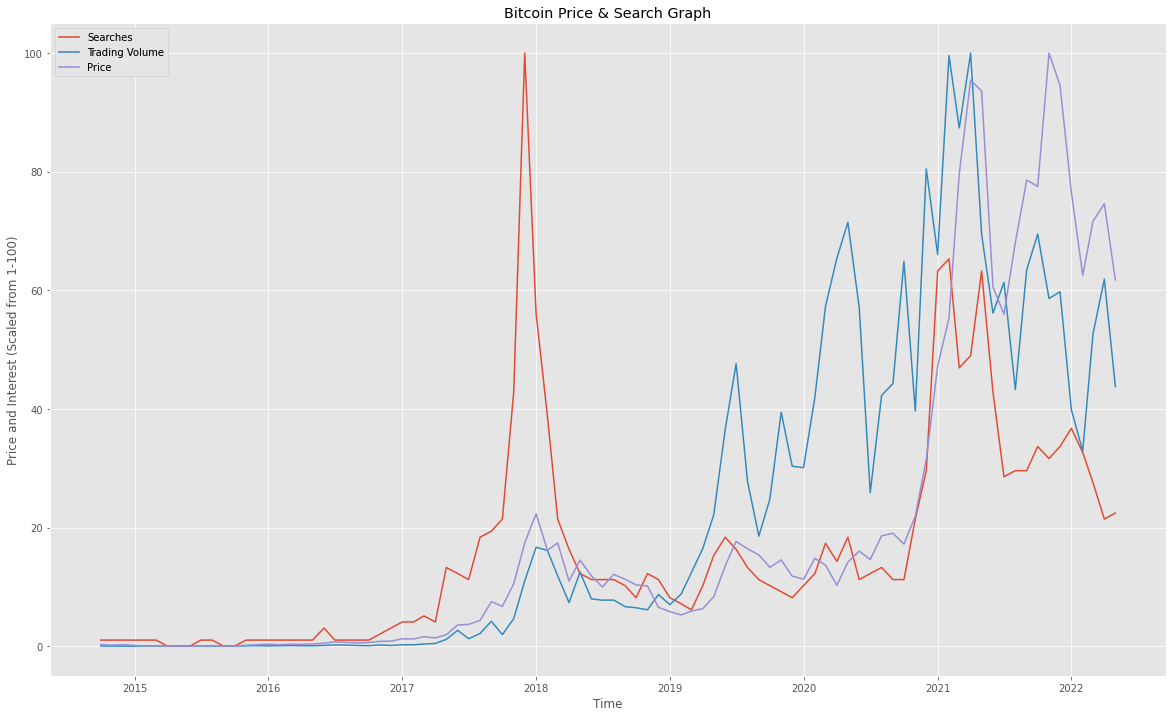

In [270]:
# Create subplots
fig, ax = plt.subplots()
line1, = ax.plot(df_scale['Bitcoin'], label="Searches")
line2, = ax.plot(df_scale['Volume'], label="Trading Volume")
line3, = ax.plot(df_scale['High'], label="Price")

# Create a legend for the plot
first_legend = ax.legend(handles=[line1,line2,line3], loc='upper left')

# Add the legend manually to the Axes.
ax.add_artist(first_legend)

# Label the x and y axis
plt.xlabel("Time")
plt.ylabel("Price and Interest (Scaled from 1-100)")

# Add a title to the plot
plt.title("Bitcoin Price & Search Graph")

# Save the plot to present directory
plt.rcParams["figure.figsize"] = (20,12)
plt.savefig("plots\\btc_price_and_interest.jpg", dpi = 300)

# Show the plot
plt.show()


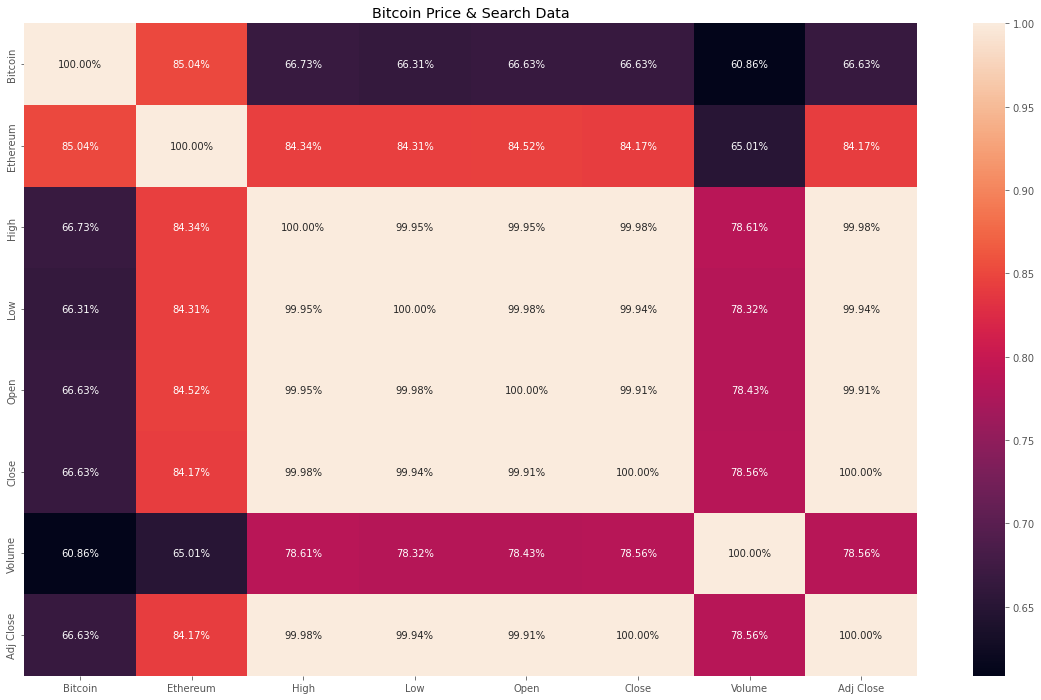

In [274]:
plt.subplots(figsize= (20,12))
sns.heatmap(bpi_corr, annot= True, fmt= '.2%')
plt.title("Bitcoin Price & Search Data")
plt.savefig("plots\\bpi_corr.jpg", dpi = 300)

# OTHER

In [ ]:
# Plot BTC Volume
btc['Volume'].plot(figsize=(10, 6))
# Label the x and y axis
plt.xlabel("Date")
plt.ylabel("Price")
# Save the plot to present directory
plt.savefig("plots\\btc_volume.png")

In [5]:
# initialize a new Google Trends Request Object
pt = TrendReq(hl="en-US", tz=360)
# set the keyword & timeframe
keywords = ["Coinbase", "Binance"]
pt.build_payload(keywords, timeframe="all")
# get the interest over time
exch_iot = pt.interest_over_time()
# Save iot as a .csv file in the current directory
exch_iot.to_csv("data\\exch_iot.csv")
exch_iot

,Coinbase,Binance,isPartial
date,,,
2004-01-01,0,0,False
2004-02-01,0,0,False
2004-03-01,0,0,False
2004-04-01,0,0,False
2004-05-01,0,0,False
...,...,...,...
2022-01-01,5,10,False
2022-02-01,4,7,False
2022-03-01,3,7,False


In [29]:
# import pandas_datareader as web
# import datetime as dt

# start = dt.datetime(2009,1,3)
# end = dt.datetime(2022,5,1)
# # end = dt.datetime.now()

# btc = web.DataReader('BTC-USD', 'yahoo', start, end)
# btc.to_csv("data\\exch.csv")

# for i in btc.index:
#     # print(str(i)[8:10])
#     if str(i)[8:10] != '01':
#         btc.drop(i, inplace=True)
# btc

In [ ]:
# Create subplots
fig, ax = plt.subplots()
line1, = ax.plot(exch_iot['Coinbase'].truncate(before=list(exch_iot.index)[145]), label="Coinbase")
line2, = ax.plot(exch_iot['Binance'].truncate(before=list(exch_iot.index)[145]), label="Binance")

# Create a legend for the plot
first_legend = ax.legend(handles=[line1,line2], loc='upper left')

# Add the legend manually to the Axes.
ax.add_artist(first_legend)

# Label the x and y axis
plt.xlabel("Date")
plt.ylabel("Relative Interest")

# Add a title to the plot
plt.title("Crypto Exchange Interest Over Time")

# Save the plot to present directory
plt.rcParams["figure.figsize"] = (20,12)
plt.savefig("plots\\exch_iot.jpg", dpi = 300)

# Show the plot
plt.show()


In [ ]:
# Plot BTC Volume
btc['High'].plot(figsize=(10, 6))
# Label the x and y axis
plt.xlabel("Date")
plt.ylabel("Price")
# Save the plot to present directory
plt.savefig("plots\\btc_volume.png")

In [14]:
# the keyword to extract data
keyword = ["Bitcoin"]
pt.build_payload(keyword, timeframe="all")
# get the interest by country
ibr = pt.interest_by_region("COUNTRY", inc_low_vol=True, inc_geo_code=True)
# Convert the series ibr to pandas dataframe
ibr = pd.DataFrame(ibr)
# Sort the dataframe by the value of the column "Bitcoin"
ibr.sort_values("Bitcoin", inplace=True, ascending=False)
# Save the dataframe to a csv file
ibr.to_csv("data\\ibr.csv")
ibr

,geoCode,Bitcoin
geoName,,
Nigeria,NG,100
El Salvador,SV,71
Namibia,NA,63
Eswatini,SZ,58
Cayman Islands,KY,57
...,...,...
Eritrea,ER,0
Pitcairn Islands,PN,0
Falkland Islands (Islas Malvinas),FK,0
